#**TUSSLE AMONG THE BIG THREE**

--The Genius of Roger Federer, Rafael Nadal, and Novak Djokovic

BY

Ambika Mudigonda

#Library imports

In [ ]:
!pip install sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import random
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Data Frame
Obtaining CSVs from github for years 2001 to 2019 as train data set and year 2021 as test data.

We are choosing to intentionally exclude 2020 data as COVID has skewed player rankings for that year.

In [ ]:
#obtaining csvs from github
url01 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2001.csv'
url02 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2002.csv'
url03 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2003.csv'
url04 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2004.csv'
url05 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2005.csv'
url06 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2006.csv'
url07 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2007.csv'
url08 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2008.csv'
url09 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2009.csv'
url10 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2010.csv'
url11 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2011.csv'
url12 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2012.csv'
url13 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2013.csv'
url14 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2014.csv'
url15 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2015.csv'
url16 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2016.csv'
url17 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2017.csv'
url18 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2018.csv'
url19 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2019.csv'
url20 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2020.csv'
url21 = 'https://raw.githubusercontent.com/samsonntruong/tennis_atp/master/atp_matches_2021.csv'

#translating csv into dataframe
df01 = pd.read_csv(url01,index_col=0,skipinitialspace=True)
df02 = pd.read_csv(url02,index_col=0,skipinitialspace=True)
df03 = pd.read_csv(url03,index_col=0,skipinitialspace=True)
df04 = pd.read_csv(url04,index_col=0,skipinitialspace=True)
df05 = pd.read_csv(url05,index_col=0,skipinitialspace=True)
df06 = pd.read_csv(url06,index_col=0,skipinitialspace=True)
df07 = pd.read_csv(url07,index_col=0,skipinitialspace=True)
df08 = pd.read_csv(url08,index_col=0,skipinitialspace=True)
df09 = pd.read_csv(url09,index_col=0,skipinitialspace=True)
df10 = pd.read_csv(url10,index_col=0,skipinitialspace=True)
df11 = pd.read_csv(url11,index_col=0,skipinitialspace=True)
df12 = pd.read_csv(url12,index_col=0,skipinitialspace=True)
df13 = pd.read_csv(url13,index_col=0,skipinitialspace=True)
df14 = pd.read_csv(url14,index_col=0,skipinitialspace=True)
df15 = pd.read_csv(url15,index_col=0,skipinitialspace=True)
df16 = pd.read_csv(url16,index_col=0,skipinitialspace=True)
df17 = pd.read_csv(url17,index_col=0,skipinitialspace=True)
df18 = pd.read_csv(url18,index_col=0,skipinitialspace=True)
df19 = pd.read_csv(url19,index_col=0,skipinitialspace=True)
df20 = pd.read_csv(url20,index_col=0,skipinitialspace=True)
df21 = pd.read_csv(url21,index_col=0,skipinitialspace=True)

df01["Year"] = 2001
df02["Year"] = 2002
df03["Year"] = 2003
df04["Year"] = 2004
df05["Year"] = 2005
df06["Year"] = 2006
df07["Year"] = 2007
df08["Year"] = 2008
df09["Year"] = 2009
df10["Year"] = 2010
df11["Year"] = 2011
df12["Year"] = 2012
df13["Year"] = 2013
df14["Year"] = 2014
df15["Year"] = 2015
df16["Year"] = 2016
df17["Year"] = 2017
df18["Year"] = 2018
df19["Year"] = 2019
df20["Year"] = 2020
df21["Year"] = 2021

#compiling all training df into one df (years 2001 to 2020 are training set and 2021 is test set)
df = df11.append([df01,df02, df03,df04,df05, df06, df07, df08, df09, df10, df11, df12, df13,df14,df15, df16, df17, df18, df19,df20, df21])

In [ ]:
#checking dataframe
df.shape

(65428, 49)

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Preparation
Data contains 29000 records with 49 attributes. As our focus is on top players and we plan to predict their wins, we require Data pre-processing steps. 


1.   Extracting data for the Top Players
2.   Data Processing to bin continuous features
3.   Cleaning by removing unwanted features and NAs
4.   Converting features to category data type
5.   Encoding categories of features
6.   Nesting df for the top players







##Extracting data for the Top Players

The data has entries for all players for all the tournaments from 2011 to 2019 and 2021. Extracting data for the top 3 and also the 4th for the analyses. Though David Ferrer stands 4th, as he retired in 2019, we go on to Andy Murray.

In [ ]:
df_top = df

#Number of wins for each player
df_top['winner_name'] = df_top['winner_name'].astype('category')
df_top['loser_name'] = df_top['loser_name'].astype('category')
counts = df_top['winner_name'].value_counts()

#Creating cateogry 'Others' for players with wins < 750 and not considering David Ferrer
others = counts[(counts <= 750) | (counts == 799)].index
label = "Others"
df_top['winner_name'] = df_top['winner_name'].cat.add_categories([label])
df_top['winner_name'] = df_top['winner_name'].replace(others, label)
df_top['loser_name'] = df_top['loser_name'].cat.add_categories([label])
df_top['loser_name'] = df_top['loser_name'].replace(others, label)

In [ ]:
#count of wins after addition of new cateogry
counts2 = df_top['winner_name'].value_counts()
counts2

Others            61225
Roger Federer      1272
Rafael Nadal       1106
Novak Djokovic     1067
Andy Murray         758
Name: winner_name, dtype: int64

In [ ]:
#Removing the cateogry "Others"
df_top = df_top[(df_top["winner_name"] != "Others") & (df_top["loser_name"] != "Others")]
print(df_top.shape)
df_top.astype("object").describe()

#The top 20 players being considered for analysis
top_4 = pd.DataFrame({"Players":df_top['winner_name'].cat.categories})
print(top_4)

(268, 49)
          Players
0     Andy Murray
1  Novak Djokovic
2    Rafael Nadal
3   Roger Federer
4          Others


##Data Preprocessing
Predicting the winner is a classification problem. Categorical input and output for the analyses requires binning of non-categorical inputs.

In [ ]:
#Binning continuous variables: height
height_bin = [175, 185, 195, 206]
labels = [1,2,3]
df_top['winner_ht_binned'] = pd.cut(df_top['winner_ht'], bins=height_bin, labels=labels)
df_top['loser_ht_binned'] = pd.cut(df_top['loser_ht'], bins=height_bin, labels=labels)

In [ ]:
#Binning ordinal rank data as cateogries from 1 being top most players rank wise
#Binning is preferred as rank data ranges over 2000 ranks
rank_bin = [0, 10, 50, 200, 400, 650, 1080]
labels = [1,2,3,4,5,6]
df_top['winner_rank_binned'] = pd.cut(df_top['winner_rank'], bins=rank_bin, labels=labels)
df_top['loser_rank_binned'] = pd.cut(df_top['loser_rank'], bins=rank_bin, labels=labels)

In [ ]:
#Data contains winner and loser in separate columns
#Hence randomising among then into new columns as Player1 and Player2
r=np.array(df_top[["winner_name", "loser_name"]])
for i in range(len(r)):
  np.random.shuffle(r[i])
r_T=np.transpose(r)
df_top["player1"] = r_T[0]
df_top["player2"] = r_T[1]
df_top.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year,winner_ht_binned,loser_ht_binned,winner_rank_binned,loser_rank_binned,player1,player2
tourney_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-580,Australian Open,Hard,128,G,20110117,126,104925,3.0,NaN,Novak Djokovic,R,188.0,SRB,23.657769,103819,2.0,NaN,Roger Federer,R,185.0,SUI,29.442847,7-6(3) 7-5 6-4,5,SF,180.0,6.0,5.0,125.0,86.0,63.0,16.0,17.0,7.0,10.0,5.0,0.0,105.0,62.0,45.0,20.0,17.0,9.0,14.0,3.0,6240.0,2.0,9245.0,2011,2,1,1,1,Roger Federer,Novak Djokovic
2011-580,Australian Open,Hard,128,G,20110117,127,104925,3.0,NaN,Novak Djokovic,R,188.0,SRB,23.657769,104918,5.0,NaN,Andy Murray,R,190.0,GBR,23.676934,6-4 6-2 6-3,5,F,159.0,5.0,0.0,75.0,48.0,35.0,15.0,14.0,1.0,4.0,6.0,4.0,109.0,59.0,37.0,16.0,13.0,11.0,18.0,3.0,6240.0,5.0,5760.0,2011,2,2,1,1,Andy Murray,Novak Djokovic
2011-495,Dubai,Hard,32,A,20110221,31,104925,2.0,NaN,Novak Djokovic,R,188.0,SRB,23.753593,103819,1.0,NaN,Roger Federer,R,185.0,SUI,29.538672,6-3 6-3,3,F,72.0,5.0,0.0,49.0,33.0,27.0,9.0,9.0,1.0,2.0,5.0,1.0,58.0,35.0,22.0,9.0,9.0,6.0,10.0,3.0,7880.0,2.0,7965.0,2011,2,1,1,1,Novak Djokovic,Roger Federer
2011-404,Indian Wells Masters,Hard,96,M,20110310,94,104925,3.0,NaN,Novak Djokovic,R,188.0,SRB,23.791923,103819,2.0,NaN,Roger Federer,R,185.0,SUI,29.577002,6-3 3-6 6-2,3,SF,127.0,3.0,4.0,85.0,57.0,36.0,15.0,13.0,6.0,9.0,1.0,2.0,85.0,48.0,33.0,15.0,13.0,5.0,10.0,3.0,7800.0,2.0,7965.0,2011,2,1,1,1,Novak Djokovic,Roger Federer
2011-404,Indian Wells Masters,Hard,96,M,20110310,95,104925,3.0,NaN,Novak Djokovic,R,188.0,SRB,23.791923,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,24.758385,4-6 6-3 6-2,3,F,146.0,4.0,4.0,89.0,55.0,41.0,18.0,14.0,6.0,9.0,2.0,0.0,69.0,29.0,20.0,23.0,13.0,3.0,8.0,3.0,7800.0,1.0,12390.0,2011,2,1,1,1,Novak Djokovic,Rafael Nadal


In [ ]:
#Dropping unnecessary variables
cleandf = df_top.drop(['winner_id','winner_seed','winner_entry','winner_ioc',
                       'loser_id','loser_seed','loser_entry','loser_ioc',
                       'tourney_date','match_num','tourney_date','draw_size',
                       'score','best_of','round','minutes',
                       'w_ace',	'w_df',	'w_svpt',	'w_1stIn',	'w_1stWon',	'w_2ndWon',	'w_SvGms', 'w_bpSaved',	'w_bpFaced',
                       'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon',	'l_SvGms','l_bpSaved','l_bpFaced'],axis=1)

In [ ]:
#dropping NAs
cleandf = cleandf.dropna(subset=['tourney_name', 'surface', 'tourney_level', 
                                  'winner_hand', 'winner_rank','winner_ht_binned', 
                               'loser_hand', 'loser_rank','loser_ht_binned'])
cleandf.shape

(262, 22)

In [ ]:
cleandf.tail()

,tourney_name,surface,tourney_level,winner_name,winner_hand,winner_ht,winner_age,loser_name,loser_hand,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year,winner_ht_binned,loser_ht_binned,winner_rank_binned,loser_rank_binned,player1,player2
tourney_id,,,,,,,,,,,,,,,,,,,,,,
2020-8888,Atp Cup,Hard,A,Novak Djokovic,R,188.0,32.626968,Rafael Nadal,L,185.0,33.593429,2.0,9055.0,1.0,9985.0,2020,2,1,1,1,Novak Djokovic,Rafael Nadal
2020-580,Australian Open,Hard,G,Novak Djokovic,R,188.0,32.665298,Roger Federer,R,185.0,38.450376,2.0,9720.0,3.0,6590.0,2020,2,1,1,1,Novak Djokovic,Roger Federer
2020-520,Roland Garros,Clay,G,Rafael Nadal,L,185.0,34.321697,Novak Djokovic,R,188.0,33.355236,2.0,9850.0,1.0,11260.0,2020,1,2,1,1,Rafael Nadal,Novak Djokovic
2021-0416,Rome Masters,Clay,M,Rafael Nadal,L,185.0,34.934976,Novak Djokovic,R,188.0,33.968515,3.0,9630.0,1.0,11463.0,2021,1,2,1,1,Rafael Nadal,Novak Djokovic
2021-520,Roland Garros,Clay,G,Novak Djokovic,R,188.0,34.026010,Rafael Nadal,L,185.0,34.992471,1.0,11313.0,3.0,9630.0,2021,2,1,1,1,Rafael Nadal,Novak Djokovic


##Conversion and Encoding
The data needs to be converted from int, string etc to categories.

In [ ]:
cleandf['tourney_name'] = cleandf['tourney_name'].astype('category')
cleandf['surface'] = cleandf["surface"].astype("category")
cleandf['tourney_level'] = cleandf["tourney_level"].astype("category")
cleandf['winner_hand'] = cleandf["winner_hand"].astype("category")
cleandf['loser_hand'] = cleandf["loser_hand"].astype("category")
cleandf['player1'] = cleandf["player1"].astype("category")
cleandf['player2'] = cleandf["player2"].astype("category")
cleandf['winner_name'] = cleandf["winner_name"].astype("category")

In [ ]:
## Encoding categories
encoder = LabelEncoder()

cleandf["tourney_name_e"] = encoder.fit_transform(cleandf['tourney_name'])
cleandf["surface_e"] = encoder.fit_transform(cleandf['surface'])
cleandf["tourney_level_e"] = encoder.fit_transform(cleandf['tourney_level'])
cleandf[["winner_rank_e","loser_rank_e"]] = cleandf[["winner_rank_binned","loser_rank_binned"]].apply(encoder.fit_transform)
cleandf[["winner_hand_e","loser_hand_e"]] = cleandf[["winner_hand","loser_hand"]].apply(encoder.fit_transform)

top_4["Players Encoded"] = encoder.fit_transform(top_4['Players'])
#cleandf = cleandf.merge(top_20, left_on="player1", right_on="Players")
#cleandf = cleandf.merge(top_20, left_on="player2", right_on="Players")
cleandf['player1_e'] = cleandf['player1'].map(top_4.set_index('Players')['Players Encoded'])
cleandf['player2_e'] = cleandf['player2'].map(top_4.set_index('Players')['Players Encoded'])
cleandf['winner_e'] = cleandf['winner_name'].map(top_4.set_index('Players')['Players Encoded'])
cleandf = cleandf.dropna(subset=["player1_e","player2_e","winner_e"])
cleandf[["player1_e","player2_e"]] = cleandf[["player1_e","player2_e"]].astype(int)
#cleandf["winner_e"] = encoder.fit_transform(cleandf['winner_name'])
cleandf.head()


,tourney_name,surface,tourney_level,winner_name,winner_hand,winner_ht,winner_age,loser_name,loser_hand,loser_ht,loser_age,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year,winner_ht_binned,loser_ht_binned,winner_rank_binned,loser_rank_binned,player1,player2,tourney_name_e,surface_e,tourney_level_e,winner_rank_e,loser_rank_e,winner_hand_e,loser_hand_e,player1_e,player2_e,winner_e
tourney_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-580,Australian Open,Hard,G,Novak Djokovic,R,188.0,23.657769,Roger Federer,R,185.0,29.442847,3.0,6240.0,2.0,9245.0,2011,2,1,1,1,Roger Federer,Novak Djokovic,1,3,3,0,0,1,1,4,1,1
2011-580,Australian Open,Hard,G,Novak Djokovic,R,188.0,23.657769,Andy Murray,R,190.0,23.676934,3.0,6240.0,5.0,5760.0,2011,2,2,1,1,Andy Murray,Novak Djokovic,1,3,3,0,0,1,1,0,1,1
2011-495,Dubai,Hard,A,Novak Djokovic,R,188.0,23.753593,Roger Federer,R,185.0,29.538672,3.0,7880.0,2.0,7965.0,2011,2,1,1,1,Novak Djokovic,Roger Federer,11,3,0,0,0,1,1,1,4,1
2011-404,Indian Wells Masters,Hard,M,Novak Djokovic,R,188.0,23.791923,Roger Federer,R,185.0,29.577002,3.0,7800.0,2.0,7965.0,2011,2,1,1,1,Novak Djokovic,Roger Federer,13,3,4,0,0,1,1,1,4,1
2011-404,Indian Wells Masters,Hard,M,Novak Djokovic,R,188.0,23.791923,Rafael Nadal,L,185.0,24.758385,3.0,7800.0,1.0,12390.0,2011,2,1,1,1,Novak Djokovic,Rafael Nadal,13,3,4,0,0,1,0,1,3,1


##Nesting DF
Nested data frame for 6 sets of players.

In [ ]:
train = cleandf
df1 = AndyNovak = train[(train["winner_name"] == "Andy Murray") & (train["loser_name"] == "Novak Djokovic") |
                  (train["winner_name"] == "Novak Djokovic") & (train["loser_name"] == "Andy Murray")]
df2 = AndyNadal = train[(train["winner_name"] == "Andy Murray") & (train["loser_name"] == "Rafael Nadal" )|
                  (train["winner_name"] == "Rafael Nadal") & (train["loser_name"] == "Andy Murray")]
df3 = AndyFederer = train[(train["winner_name"] == "Andy Murray") & (train["loser_name"] == "Roger Federer") |
                  (train["winner_name"] == "Roger Federer") & (train["loser_name"] == "Andy Murray")]
df4 = NovakNadal = train[(train["winner_name"] == "Rafael Nadal") & (train["loser_name"] == "Novak Djokovic") |
                  (train["winner_name"] == "Novak Djokovic") & (train["loser_name"] == "Rafael Nadal")]
df5 = NovakFederer = train[(train["winner_name"] == "Roger Federer") & (train["loser_name"] == "Novak Djokovic") |
                  (train["winner_name"] == "Novak Djokovic") & (train["loser_name"] == "Roger Federer")]
df6 = RafaelFederer = train[(train["winner_name"] == "Rafael Nadal") & (train["loser_name"] == "Roger Federer") |
                 (train["winner_name"] == "Roger Federer") & (train["loser_name"] == "Rafael Nadal")]

nested_df = pd.DataFrame({'idx':[1,2,3,4,5,6], 'dfs':[df1, df2, df3,df4,df5,df6]})

for i in range(0,6):
  print(nested_df['dfs'].iloc[i].shape)


(39, 32)
(30, 32)
(25, 32)
(64, 32)
(56, 32)
(45, 32)


#Naive Bayes
Categorical Naive Bayes has input as categories and classifies the output. Multi-classification Naive Bayes is used in this analyses to predict the win of players from years 2018 to 2021.

Steps followed:

1.   Data
2.   Train data
3.   Fit
4.   Test data
5.   Predict
6.   Misclassification count
7.   Confusion matrix
8.   Accuracy



Players Andy Murray  and  Novak Djokovic have not come across each other in years 2018 to 2021.
Players Rafael Nadal  and  Andy Murray have not come across each other in years 2018 to 2021.
Players Andy Murray  and  Roger Federer have not come across each other in years 2018 to 2021.
           Predicted winner  Predicted Probability   Actual winner
tourney_id                                                        
2018-M009    Novak Djokovic               0.513587    Rafael Nadal
2018-540       Rafael Nadal               0.573615  Novak Djokovic
2019-580     Novak Djokovic               0.731583  Novak Djokovic
2019-M009    Novak Djokovic               0.513587    Rafael Nadal
2020-8888    Novak Djokovic               0.721894  Novak Djokovic
2020-520       Rafael Nadal               0.918702    Rafael Nadal
2021-0416    Novak Djokovic               0.513587    Rafael Nadal
2021-520       Rafael Nadal               0.918702  Novak Djokovic
           Predicted winner  Predicted Probab

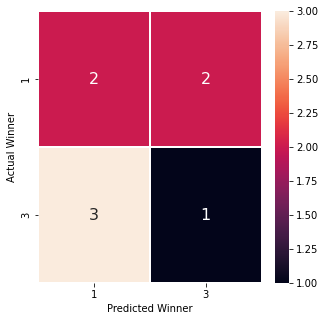

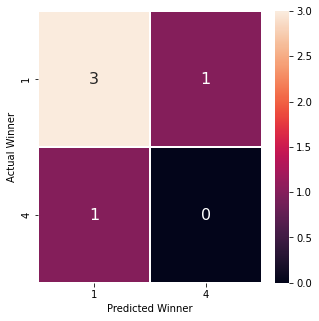

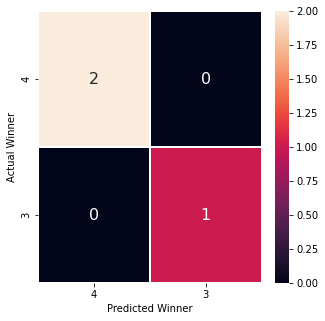

In [ ]:
#pulling relevant 2 players data
count_misclassified = []
accuracy = []
Model = pd.DataFrame()

for i in range(0,6):
  df = nested_df['dfs'].iloc[i]
  
  #train
  train_df = df[(df["Year"] !=  2020) & (df["Year"] !=  2021) & (df["Year"] !=  2019) & (df["Year"] !=  2018)]
  X = train_df[['tourney_name_e', 'surface_e', 'tourney_level_e']]
  y = train_df['winner_e'].values

  #fit
  cnb = CategoricalNB()
  cnb.fit(X, y)

  #test
  test_df = df[(df["Year"] ==  2020) | (df["Year"] ==  2021) | (df["Year"] ==  2019) | (df["Year"] ==  2018)]
  X_test = test_df[['tourney_name_e', 'surface_e', 'tourney_level_e']]
  y_test = test_df['winner_e'].values

  #predict
  p1 = df.iloc[i][20]
  p1_e = df.iloc[i][29]
  p2 = df.iloc[i][21]
  p2_e = df.iloc[i][30]
  if test_df.empty:
    print("Players", p1, " and ", p2, "have not come across each other in years 2018 to 2021." )
  else: 
    y_pred_cnb = cnb.predict(X_test)
    y_prob_pred_cnb = cnb.predict_proba(X_test)
    test_df['Predicted Win Class'] = y_pred_cnb
    test_df['Predicted winner'] = test_df['Predicted Win Class'].map(top_4.set_index('Players Encoded')['Players'])
    test_df['Predicted Probability'] = np.max(y_prob_pred_cnb, axis=1)
    test_df['Actual winner'] = test_df['winner_name']
  
    #Misclassification
    l = (y_test != y_pred_cnb).sum()
    count_misclassified.append(l)
    
    #Confusion matrix
    labels = [p1_e,p2_e]
    cm = confusion_matrix(y_test, y_pred_cnb, labels=labels)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, annot_kws={"fontsize":16})
    ax.set_xlabel('Predicted Winner');ax.set_ylabel('Actual Winner'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)    

    #Accuracy measure
    m = accuracy_score(y_test, y_pred_cnb)
    accuracy.append(m)

    print(test_df.iloc[:,-3:])

Model["Count Misclassified"] = count_misclassified
Model["Accuracy"] = accuracy


In [ ]:
top_4["Players Encoded"].sort_values()
top_4

,Players,Players Encoded
0,Andy Murray,0
1,Novak Djokovic,1
2,Rafael Nadal,3
3,Roger Federer,4
4,Others,2
